In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('motor.csv')
df.head()

model_name  model_year      kms_driven        owner   
0     Bajaj Avenger Cruise 220 2017        2017        17000 Km  first owner  \
1  Royal Enfield Classic 350cc 2016        2016        50000 Km  first owner   
2               Hyosung GT250R 2012        2012        14795 Km  first owner   
3        Bajaj Dominar 400 ABS 2017        2017  Mileage 28 Kms  first owner   
4             Jawa Perak 330cc 2020        2020         2000 Km  first owner   

        mileage      power   price  
0  \n\n 35 kmpl     19 bhp   63500  
1  \n\n 35 kmpl  19.80 bhp  115000  
2  \n\n 30 kmpl     28 bhp  300000  
3   \n\n 28 Kms  34.50 bhp  100000  
4         \n\n      30 bhp  197500

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   mileage     7846 non-null   object
 5   power       7826 non-null   object
 6   price       7857 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 429.8+ KB


In [11]:
df.dtypes

model_name    object
model_year     int64
kms_driven    object
owner         object
mileage       object
power         object
price          int64
dtype: object

In [12]:
# xóa khoảng trắng khỏi dữ liệu
for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.strip()

In [13]:
# Xóa dấu phẩy khỏi cột kms_drive và cột giá
def clean_kms_driven(val):
    if not val:
        return ''

    val = val.lower()

    if 'kms' in val:
        val = val.replace('kms','')

    if 'km' in val:
        val = val.replace('km','')

    if 'mileage' in val.lower():
        return np.nan

    return val.replace(',','')


In [14]:
def clean_price(val):
    if not val:
        return ''

    val = str(val)

    val = val.replace(',','')


    return val
    

In [15]:
df['kms_driven'] = df['kms_driven'].apply(clean_kms_driven)

df['price'] = df['price'].apply(clean_price)

In [16]:
df['kms_driven'] = pd.to_numeric(df['kms_driven'],errors='coerce',downcast='integer')
df['price'] = pd.to_numeric(df['price'],errors='coerce',downcast='integer')

In [17]:
# onwer feature 
def clean_owner(val):
    if not val:
        return val

    val = val.replace('owner','')

    if 'or more' in val.lower():
        return 'fourth'

    return val.strip()

df['owner'] = df['owner'].apply(clean_owner)


In [18]:
# mileage
def clean_mileage(val):
    if not val:
        return np.nan
    
    return str(val).lower().replace('kmpl','')

df['mileage'] = df.mileage.apply(clean_mileage)

In [19]:
# power
def clean_power(val):
    if not val:
        return np.nan
    
    return str(val).lower().replace('bhp','')

df['power'] = df.power.apply(clean_power)


In [20]:
# Sửa kiểu dữ liệu cột
cols = ['kms_driven', 'price','mileage','power']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='integer')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model_name  7857 non-null   object 
 1   model_year  7857 non-null   int64  
 2   kms_driven  5869 non-null   float64
 3   owner       7857 non-null   object 
 4   mileage     6883 non-null   float64
 5   power       7429 non-null   float64
 6   price       7826 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 429.8+ KB


In [22]:
#Xử lý model_name
df['company'] = df['model_name'].apply(lambda x:' '.join(x.split()[0:1]))

In [23]:
df.head(8)

model_name  model_year  kms_driven   
0                    Bajaj Avenger Cruise 220 2017        2017     17000.0  \
1                 Royal Enfield Classic 350cc 2016        2016     50000.0   
2                              Hyosung GT250R 2012        2012     14795.0   
3                       Bajaj Dominar 400 ABS 2017        2017         NaN   
4                            Jawa Perak 330cc 2020        2020      2000.0   
5                              KTM Duke 200cc 2012        2012     24561.0   
6                          Bajaj Pulsar 180cc 2016        2016     19718.0   
7  TVS Apache RTR 200 4V Dual Channel ABS BS6 2020        2020         NaN   

   owner  mileage  power     price  company  
0  first     35.0  19.00   63500.0    Bajaj  
1  first     35.0  19.80  115000.0    Royal  
2  first     30.0  28.00  300000.0  Hyosung  
3  first      NaN  34.50  100000.0    Bajaj  
4  first      NaN  30.00  197500.0     Jawa  
5  third     35.0  25.00   63400.0      KTM  
6  first     65.0  17.00   55000.0    Bajaj  
7  first     40.0  20.21  120000.0      TVS

In [24]:
#trích xuất chi tiết động cơ dưới dạng cc từ model_name
import re
def extract_cc(val):
    match =  re.search(r"\d{2,}(cc)", val) 
    if match:
        return match.group().replace('cc','')
    else:
        return None
    

df['engine'] = df['model_name'].apply(extract_cc)

In [25]:
df['engine'] = pd.to_numeric(df['engine'], errors='coerce', downcast='integer')

In [26]:
#Dropping giá trị null 
df.dropna(inplace=True)


In [27]:
df.duplicated().sum()

17

In [28]:
#kiểm tra giá trị null
df.isna().sum()

model_name    0
model_year    0
kms_driven    0
owner         0
mileage       0
power         0
price         0
company       0
engine        0
dtype: int64

In [29]:
df.shape

(3736, 9)

In [30]:
df.head()

model_name  model_year  kms_driven  owner  mileage   
1   Royal Enfield Classic 350cc 2016        2016     50000.0  first     35.0  \
5                KTM Duke 200cc 2012        2012     24561.0  third     35.0   
6            Bajaj Pulsar 180cc 2016        2016     19718.0  first     65.0   
8                KTM Duke 390cc 2018        2018      1350.0  first     25.0   
10  Royal Enfield Classic 350cc 2018        2018     25000.0  first     35.0   

    power     price company  engine  
1    19.8  115000.0   Royal   350.0  
5    25.0   63400.0     KTM   200.0  
6    17.0   55000.0   Bajaj   180.0  
8    42.9  198000.0     KTM   390.0  
10   19.8  136900.0   Royal   350.0

In [31]:
df['model_name']=df['model_name'].str.split().str.slice(start=0,stop=2).str.join(' ')

In [32]:
df=df.reset_index(drop=True)

In [33]:
#clean data
df

model_name  model_year  kms_driven  owner  mileage  power     price   
0      Royal Enfield        2016     50000.0  first     35.0   19.8  115000.0  \
1           KTM Duke        2012     24561.0  third     35.0   25.0   63400.0   
2       Bajaj Pulsar        2016     19718.0  first     65.0   17.0   55000.0   
3           KTM Duke        2018      1350.0  first     25.0   42.9  198000.0   
4      Royal Enfield        2018     25000.0  first     35.0   19.8  136900.0   
...              ...         ...         ...    ...      ...    ...       ...   
3731    Hero Karizma        2011     66780.0  first     48.0   20.0   39899.0   
3732  Yamaha YZF-R15        2011      7000.0  first     42.0   16.0   55000.0   
3733    Bajaj Pulsar        2016      6407.0  first     65.0   17.0   61740.0   
3734       Bajaj V15        2016      7524.0  first     57.0   11.8   49000.0   
3735    Bajaj Pulsar        2016     15000.0  first     38.0   21.0   65000.0   

     company  engine  
0      Royal   350.0  
1        KTM   200.0  
2      Bajaj   180.0  
3        KTM   390.0  
4      Royal   350.0  
...      ...     ...  
3731    Hero   223.0  
3732  Yamaha   150.0  
3733   Bajaj   180.0  
3734   Bajaj   150.0  
3735   Bajaj   220.0  

[3736 rows x 9 columns]

In [34]:
df.to_csv('Clean_moto_data.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3736 entries, 0 to 3735
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model_name  3736 non-null   object 
 1   model_year  3736 non-null   int64  
 2   kms_driven  3736 non-null   float64
 3   owner       3736 non-null   object 
 4   mileage     3736 non-null   float64
 5   power       3736 non-null   float64
 6   price       3736 non-null   float64
 7   company     3736 non-null   object 
 8   engine      3736 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 262.8+ KB


In [36]:
df.describe(include='all')

model_name   model_year      kms_driven  owner      mileage   
count            3736  3736.000000     3736.000000   3736  3736.000000  \
unique             70          NaN             NaN      4          NaN   
top     Royal Enfield          NaN             NaN  first          NaN   
freq             1469          NaN             NaN   3215          NaN   
mean              NaN  2014.959315    24999.908726    NaN    41.759066   
std               NaN     3.790632    30889.890413    NaN    15.550205   
min               NaN  1970.000000        0.000000    NaN     5.000000   
25%               NaN  2014.000000    11000.000000    NaN    35.000000   
50%               NaN  2016.000000    20000.000000    NaN    40.000000   
75%               NaN  2017.000000    31779.750000    NaN    45.000000   
max               NaN  2021.000000  1000000.000000    NaN    95.000000   

              power         price company       engine  
count   3736.000000  3.736000e+03    3736  3736.000000  
unique          NaN           NaN      16          NaN  
top             NaN           NaN   Royal          NaN  
freq            NaN           NaN    1491          NaN  
mean      19.806413  9.579239e+04     NaN   268.410867  
std       10.973142  8.697323e+04     NaN   139.933293  
min        7.000000  2.000000e+03     NaN   100.000000  
25%       14.000000  4.500000e+04     NaN   150.000000  
50%       19.800000  8.500000e+04     NaN   220.000000  
75%       21.000000  1.267000e+05     NaN   350.000000  
max      197.000000  1.866057e+06     NaN  1745.000000

Text(0.5, 1.0, 'Correlation Graph')

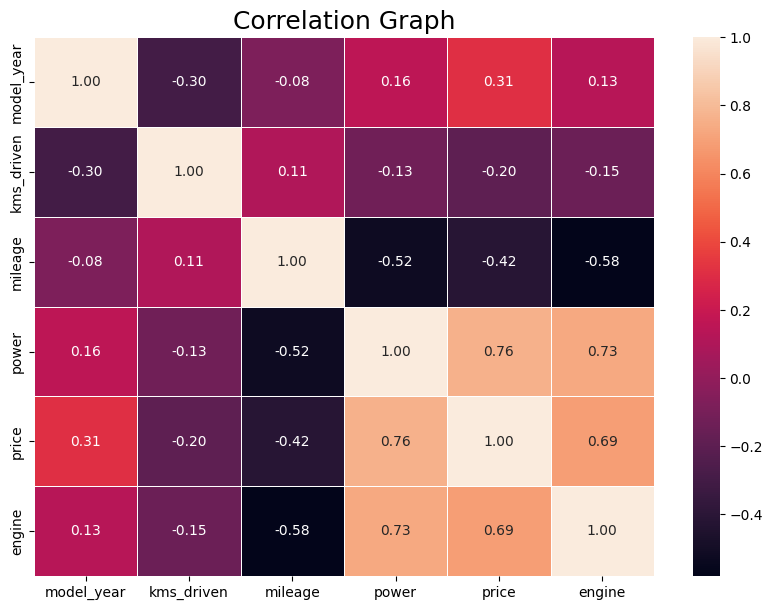

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(df[["model_year","kms_driven","mileage","power","price","engine"]].corr(), annot=True,linewidths=.5,fmt='.2f')
plt.title("Correlation Graph",size=18)

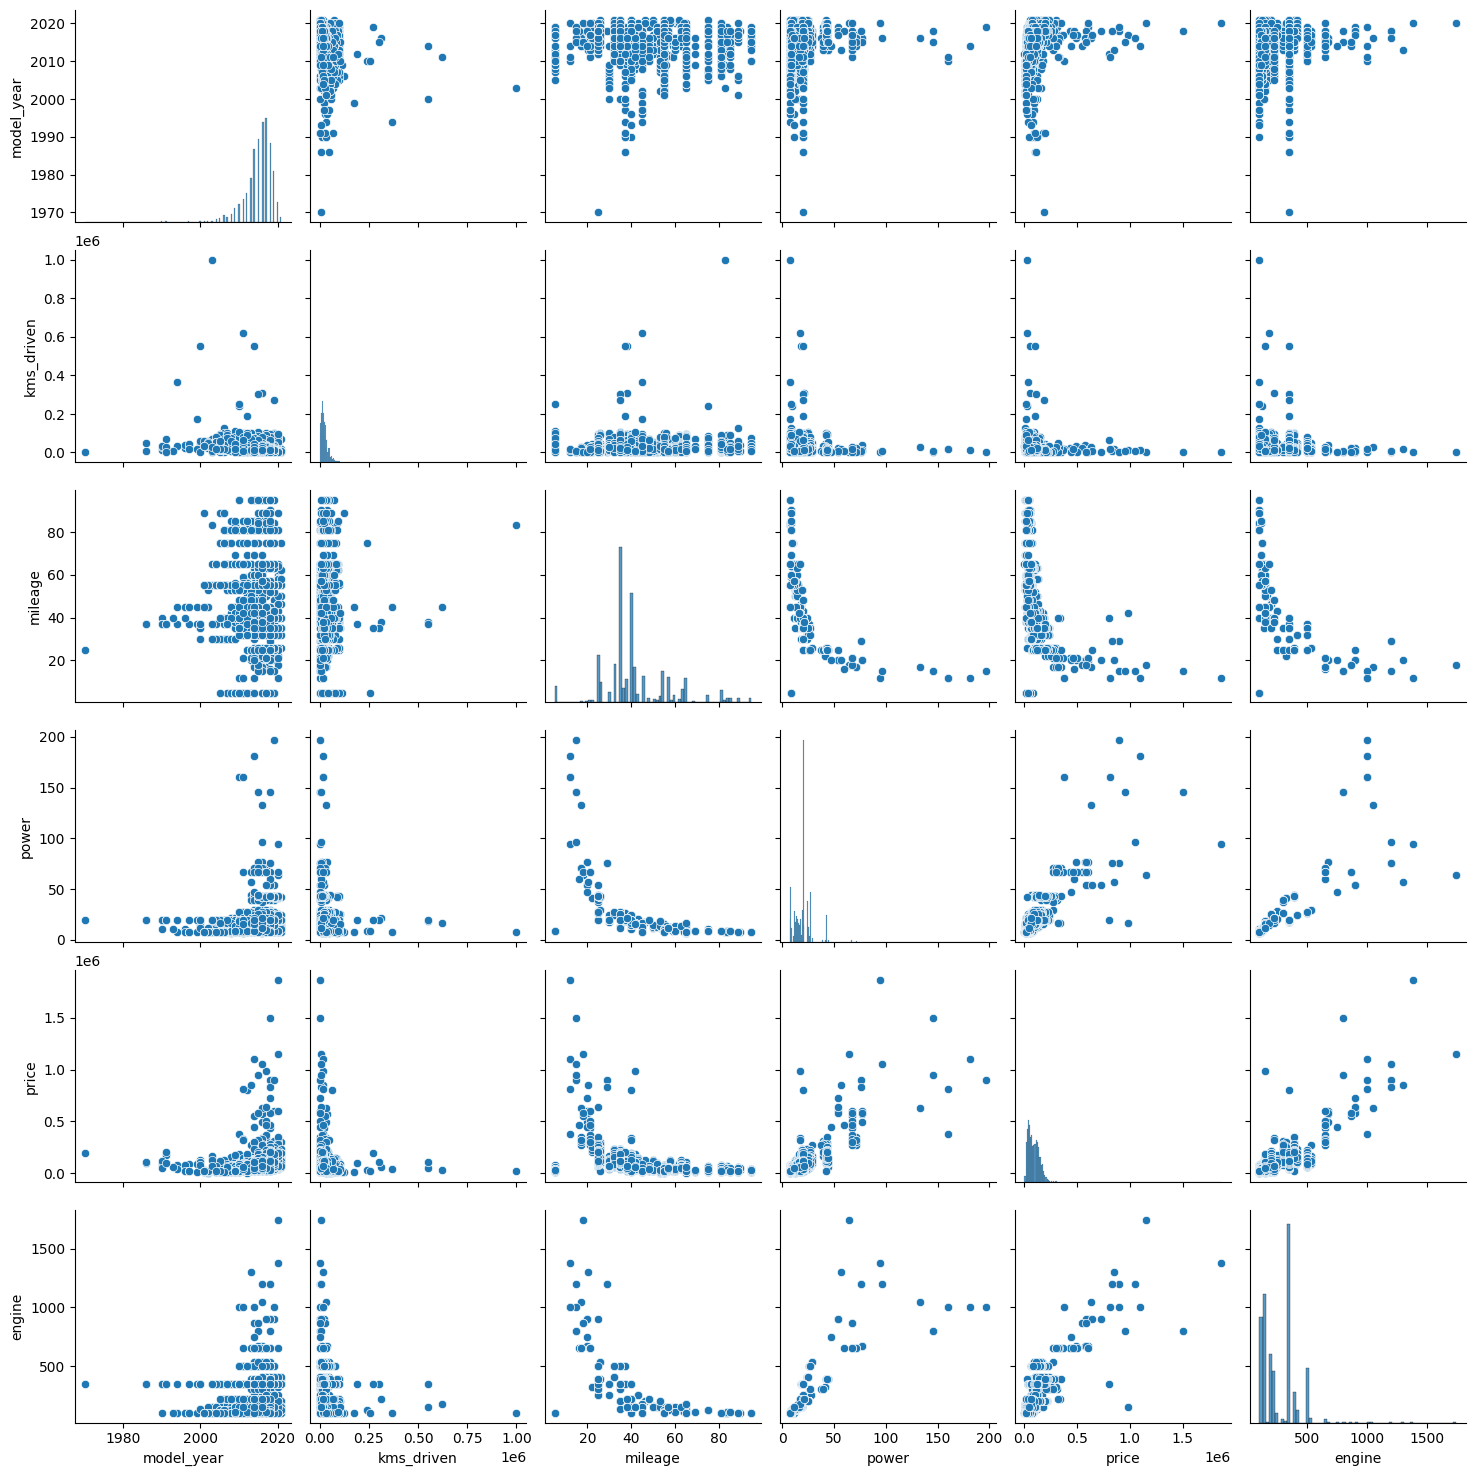

In [38]:
sns.pairplot(df)

In [39]:
X=df[['model_name','company','owner','model_year','kms_driven','mileage','power','engine']]
y=df['price']

In [40]:
X

model_name company  owner  model_year  kms_driven  mileage  power   
0      Royal Enfield   Royal  first        2016     50000.0     35.0   19.8  \
1           KTM Duke     KTM  third        2012     24561.0     35.0   25.0   
2       Bajaj Pulsar   Bajaj  first        2016     19718.0     65.0   17.0   
3           KTM Duke     KTM  first        2018      1350.0     25.0   42.9   
4      Royal Enfield   Royal  first        2018     25000.0     35.0   19.8   
...              ...     ...    ...         ...         ...      ...    ...   
3731    Hero Karizma    Hero  first        2011     66780.0     48.0   20.0   
3732  Yamaha YZF-R15  Yamaha  first        2011      7000.0     42.0   16.0   
3733    Bajaj Pulsar   Bajaj  first        2016      6407.0     65.0   17.0   
3734       Bajaj V15   Bajaj  first        2016      7524.0     57.0   11.8   
3735    Bajaj Pulsar   Bajaj  first        2016     15000.0     38.0   21.0   

      engine  
0      350.0  
1      200.0  
2      180.0  
3      390.0  
4      350.0  
...      ...  
3731   223.0  
3732   150.0  
3733   180.0  
3734   150.0  
3735   220.0  

[3736 rows x 8 columns]

In [41]:
y.shape

(3736,)

In [42]:
#train ,test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [43]:
from sklearn.linear_model import LinearRegression

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [66]:
ohe=OneHotEncoder()
ohe.fit(X[['model_name','company','owner']])

OneHotEncoder()

In [67]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['model_name','company','owner']),
                                    remainder='passthrough')

In [63]:
#Linear Regression Model
lr=LinearRegression()

In [68]:
pipe=make_pipeline(column_trans,lr)

In [69]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Aprilia RSV4', 'Bajaj Avenger', 'Bajaj CT', 'Bajaj Discover',
       'Bajaj Platina', 'Bajaj Pulsar', 'Bajaj V12', 'Bajaj V15',
       'Benelli TNT', 'Harley-Davidson Street', 'Harley-Davidson XG750',
       'Hero CD', 'Hero Glamour', 'Hero HF', 'Hero Hunk...
       'Yamaha YBR', 'Yamaha YZF-R15', 'Yamaha YZF-R1M', 'Yamaha YZF-R3'],
      dtype=object),
                                                                            array(['Aprilia', 'Bajaj', 'Benelli', 'Harley-Davidson', 'Hero', 'Honda',
       'KTM', 'Kawasaki', 'MV', 'Mahindra', 'Moto', 'Royal', 'Suzuki',
       'TVS', 'Triumph', 'Yamaha'], dtype=object),
                                                                            array(['first', 'fourth', 'second', 'third'], dtype=object)]),
                                                  ['model_name', 'company',
                                                   'owner'])])),
                ('linearregression', LinearRegression())])

In [70]:
y_pred=pipe.predict(X_test)

In [71]:
r2_score(y_test,y_pred)

0.7394663879952194

In [72]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [73]:
np.argmax(scores)

752

In [74]:
scores[np.argmax(scores)]

0.8607825778898925

In [84]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Hero Passion','Hero','first',2019,55.0,8.0,0.0,110.0]).reshape(1,8)))


array([15203.46146734])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8607825778898925

In [90]:
import pickle


In [87]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

['LinearRegressionModel.pkl']

In [91]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Hero Passion','Hero','first',2019,55.0,8.0,0.0,110.0]).reshape(1,8)))

array([15203.46146734])

In [92]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Aprilia RSV4', 'Bajaj Avenger', 'Bajaj CT', 'Bajaj Discover',
       'Bajaj Platina', 'Bajaj Pulsar', 'Bajaj V12', 'Bajaj V15',
       'Benelli TNT', 'Harley-Davidson Street', 'Harley-Davidson XG750',
       'Hero CD', 'Hero Glamour', 'Hero HF', 'Hero Hunk', 'Hero Ignitor',
       'Hero Impulse', 'Hero Karizma', 'Hero New', 'Hero Passion',
       'Hero Splendor', 'Hero Splendor+', 'Hero Super', 'Hero Xpulse',
       'Hero Xtreme', 'Honda CB', 'Honda CBR', 'Honda Dream',
       'Honda VT1300CX', 'Honda X-Blade', 'KTM Duke', 'KTM RC',
       'Kawasaki ER-6n', 'Kawasaki Ninja', 'Kawasaki Vulcan', 'MV Agusta',
       'Mahindra Centuro', 'Mahindra Mojo', 'Moto Guzzi', 'Royal Enfield',
       'Royal Enfield\u200e', 'Suzuki Fiero', 'Suzuki GS', 'Suzuki GSX-R',
       'Suzuki Gixxer', 'Suzuki Hayate', 'Suzuki Inazuma',
       'Suzuki Slingshot', 'TVS Apache', 'TVS Radeon', 'TVS Sport',
       'TVS Star', 'Triumph Bonneville', 'Triumph Speed',
       'Triumph Street', 'Triumph Thruxton'